In [11]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt

pp.InterpolationDef.path_to_tables = "/home/msackel/.local/share/PROPOSAL/"

N_SAMPLES = 100

In [12]:
args = {
    "particle_def": pp.particle.MuMinusDef(),
    "target": pp.medium.StandardRock(),
    "interpolate": True,
    "cuts": pp.EnergyCutSettings(500, 1, False)
}

cross = pp.crosssection.make_std_crosssection(**args)
decay = pp.make_decay(cross, args["particle_def"], True)

In [22]:
SAMPLE_SIZE = int(1e7)
decay_energy = decay.energy_decay([1e14]*SAMPLE_SIZE, np.random.rand(SAMPLE_SIZE), [args["target"].mass_density]*SAMPLE_SIZE)

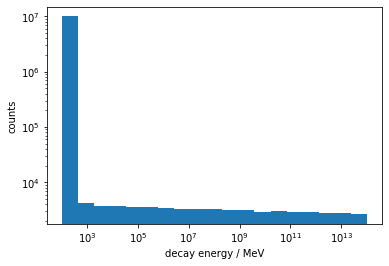

In [24]:
plt.hist(decay_energy, bins=np.geomspace(args["particle_def"].mass, 1e14, 20))
plt.xlabel("decay energy / MeV")
plt.ylabel("counts")
plt.yscale("log")
plt.xscale("log")